O problema resolvido envolve a distribuição de temperatura em uma placa retangular de dimensões 7x7 unidades, feita de um material com propriedades térmicas conhecidas (dado um valor de difusividade térmica) e com condições iniciais e de contorno específicas. O objetivo é determinar como a temperatura na placa evolui ao longo do tempo quando um método iterativo, o método de Gauss-Seidel, é aplicado repetidamente.

**Resolução do Problema:**

1. Modelagem do Problema: O problema começa com a modelagem da placa, onde a difusão de calor é regida pela equação da difusão térmica. As condições iniciais e de contorno, como a temperatura inicial e as temperaturas nas bordas da placa, são especificadas.

2. Discretização: A placa é discretizada em uma matriz, onde cada célula da matriz representa uma unidade de área na placa. A equação da difusão térmica é discretizada em diferenças finitas para aproximar a variação da temperatura.

3. Matriz Aumentada: Uma matriz aumentada é construída para representar o sistema linear de equações resultante. Cada equação representa a variação da temperatura em uma célula em relação às células vizinhas.

4. Método de Gauss-Seidel: O método de Gauss-Seidel é aplicado para resolver iterativamente o sistema linear de equações. O método consiste em atualizar as temperaturas nas células com base nas temperaturas calculadas nas iterações anteriores.

5. Iterações Temporais: O método é aplicado repetidamente em intervalos de tempo discretos. A cada iteração, as temperaturas são atualizadas com base nas temperaturas calculadas nas iterações anteriores.


**Como foi feito:**

1. O código em Python foi desenvolvido para implementar o método de Gauss-Seidel e resolver o sistema linear de equações para determinar a distribuição de temperatura na placa ao longo do tempo.

2. Uma lista foi usada para armazenar as temperaturas médias na região central da placa em cada iteração temporal.

3. Gráficos foram criados usando a biblioteca matplotlib para visualizar a evolução da temperatura média na região central da placa ao longo do tempo e a distribuição de temperatura na placa.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Problema:** 
Considere um objeto complexo de forma retangular, como uma placa metálica de tamanho mínimo de 7x7 unidades, onde cada unidade representa uma pequena região do objeto. O objetivo é determinar a distribuição de temperatura nesse objeto em relação ao tempo $t$. Suponha que a placa metálica esteja inicialmente a uma temperatura constante de 25°C em toda a sua superfície. Além disso, em $t=0$, uma fonte de calor é ligada em um ponto central da placa, fazendo com que seja exposta a uma temperatura de 16552°C. Considere as seguintes informações:

1. A placa tem uma condutividade térmica de $10 W/mk$ por unidade de área por segundo.
2. O tamanho de cada unidade na grade representa uma área de 1 cm².
3. Suponha que a placa esteja em um ambiente isolado termicamente, de modo que não haja perda de calor para o ambiente.

In [26]:
def criar_matriz_aumentada(n, difusividade_termica):
    ''' Função que cria a matriz aumentada do sistema linear com base nas dimensões da placa e na difusividade térmica.
    
    Sinopse:
        AB = criar_matriz_aumentada(n, difusividade_termica)
    
    Entradas:
        n - Dimensão da placa (n x n)
        difusividade_termica - Difusividade térmica
    
    Saídas:
        AB - Matriz aumentada (np.array) do sistema linear
    '''
    
    dx = 1.0  # Tamanho de cada célula em cm
    dt = 0.01  # Intervalo de tempo em segundos
    tamanho = n * n
    AB = np.zeros((tamanho, tamanho + 1), dtype=float)
    
    for i in range(tamanho):
        AB[i, i] = -4 * difusividade_termica
        if (i - n >= 0):
            AB[i, i - n] = difusividade_termica
        if (i + n < tamanho):
            AB[i, i + n] = difusividade_termica
        if (i % n != 0):
            AB[i, i - 1] = difusividade_termica
        if ((i + 1) % n != 0):
            AB[i, i + 1] = difusividade_termica
    
    # Defina as condições iniciais na matriz aumentada
    AB[tamanho // 2, tamanho] = 16552.0  # Condição central
    for i in range(tamanho):
        if (i != tamanho // 2):
            AB[i, tamanho] = 25.0  # Condições nas demais células
    
    return AB

In [27]:
def gaussseidel_interacoes(AB, ER, X0, max_iterations=100):
    """
    Função que executa o método de Gauss-Seidel e retorna a quantidade total de iterações até atingir a condição de parada.

    Parâmetros:
    - AB: Matriz aumentada do sistema linear.
    - ER: Erro relativo para a condição de parada.
    - X0: Vetor de estimativa inicial.
    - max_iterations: Número máximo de iterações (padrão é 100).

    Retorna:
    - iterations: Quantidade total de iterações até atingir a condição de parada.
    - X: Vetor com a solução final.
    """
    A = AB[:, 0:-1]
    B = AB[:, -1]
    X = X0
    erro = 1
    interacoes = 0

    while (erro > ER) and (interacoes < max_iterations):
        Xp = np.copy(X)
        for i in range(len(A)):
            s = 0
            for j in range(len(A)):
                if (i != j):
                    s += A[i, j] * X[j]
            X[i] = (B[i] - s) / A[i, i]
        EA = np.absolute(X - Xp)
        Emax = np.amax(EA)
        idx = np.where(EA == Emax)

        if (len(idx[0]) > 1):
            erro = np.absolute(EA[idx[0][0]] / X[idx[0][0]])
        else:
            erro = np.absolute(EA[idx[0]])

        interacoes += 1

    return interacoes, X

As equações para a difusão de calor em uma placa bidimensional são fornecidas pela equação do calor:

$\frac{\partial T}{\partial t} = \alpha (\frac{\partial^2T}{\partial x^2} + \frac{\partial^2T}{\partial y^2})$

Onde $T$ é a temperatura, $t$ é o tempo, $\alpha$ é a difusividade térmica, $x$ e $y$ são as coordenadas espaciais. No nosso caso, a placa é retangular e unidimensional. Agora, discretizamos o espaço e o tempo para usar o método de Gauss-Seidel. Suponha que discretizamos a placa em uma grade 7x7 (49 nós) e também discretizamos o tempo em intervalos de $\Delta t$.

Usamos o método de Gauss-Seidel para atualizar iterativamente as temperaturas em cada nó interno.
A fórmula de atualização para o nó $(i,j)$ em uma placa bidimensional é:

${T^{(k+1)}}_{(i,j)} = {1/4} ({T^{(k)}}_{(i + 1_{,j})} + {T^{(k + 1)}}_{(i - 1_{,j})} + {T^{(k + 1)}}_{(i, j + 1)} + {T^{(k + 1)}}_{(i, j - 1)})$

*Onde:* 
&nbsp;
- ${T^{(k+1)}}_{(i,j)}$ é a temperatura atualizada no nó $(i,j)$ após a $(k+1)$-ésima iteração.
&nbsp;
- ${T^{(k)}}_{(i,j)}$  é a temperatura no nó $(i,j)$ na $(k)$-ésima iteração.
&nbsp;
- Os termos à direita representam as temperaturas nos nós vizinhos.

O método de Gauss-Seidel é usado para resolver equações de difusão de calor iterativamente. A cada iteração, calculamos as temperaturas nos nós internos da placa com base nas temperaturas dos nós vizinhos. Isso simula a propagação do calor na placa com o tempo.

O critério de parada é importante para garantir que as iterações parem quando a distribuição de temperatura se estabilizar. Isso é feito comparando as temperaturas sucessivas nos nós e verificando se a diferença é menor que uma tolerância especificada.

Registro do Tempo Decorrido:
O tempo decorrido é o número de iterações multiplicado pelo intervalo de tempo entre as iterações $(\Delta t)$.

In [28]:
n = 7  # Tamanho da placa
difusividade_termica = 2

AB = criar_matriz_aumentada(n, difusividade_termica)
X0 = np.zeros(n * n, dtype=float) 
ER = 1e-5 #erro relativo

# Chama a função gaussseidel para resolver o sistema
# e para obter o número de iterações
iteracoes, solucao = gaussseidel_interacoes(AB, ER, X0)
resultado = np.abs(solucao)

placa_df = pd.DataFrame(np.reshape(resultado.tolist(), (n, n)), 
                        index=[f'Linha {i+1}' for i in range(n)],
                        columns=[f'Coluna {j+1}' for j in range(n)])
placa_df

,Coluna 1,Coluna 2,Coluna 3,Coluna 4,Coluna 5,Coluna 6,Coluna 7
Linha 1,150.933101,295.616951,421.274134,483.321928,421.274907,295.618138,150.934069
Linha 2,295.616951,597.762757,893.660108,1078.240990,893.661427,597.764783,295.618605
Linha 3,421.274134,893.660108,1464.865963,2029.823683,1464.867555,893.662554,421.276130
Linha 4,483.321928,1078.240990,2029.823683,4098.823683,2029.825276,1078.243436,483.323924
Linha 5,421.274907,893.661427,1464.867555,2029.825276,1464.868915,893.663515,421.276610
Linha 6,295.618138,597.764783,893.662554,1078.243436,893.663515,597.766259,295.619343
Linha 7,150.934069,295.618605,421.276130,483.323924,421.276610,295.619343,150.934671


In [29]:
print("Matriz Aumentada AB:")
abs(AB)

Matriz Aumentada AB:


array([[ 8.,  2.,  0., ...,  0.,  0., 25.],
       [ 2.,  8.,  2., ...,  0.,  0., 25.],
       [ 0.,  2.,  8., ...,  0.,  0., 25.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  0., 25.],
       [ 0.,  0.,  0., ...,  8.,  2., 25.],
       [ 0.,  0.,  0., ...,  2.,  8., 25.]])

In [30]:
print(f'Número total de iterações: {iteracoes} segundos')

Número total de iterações: 76 segundos


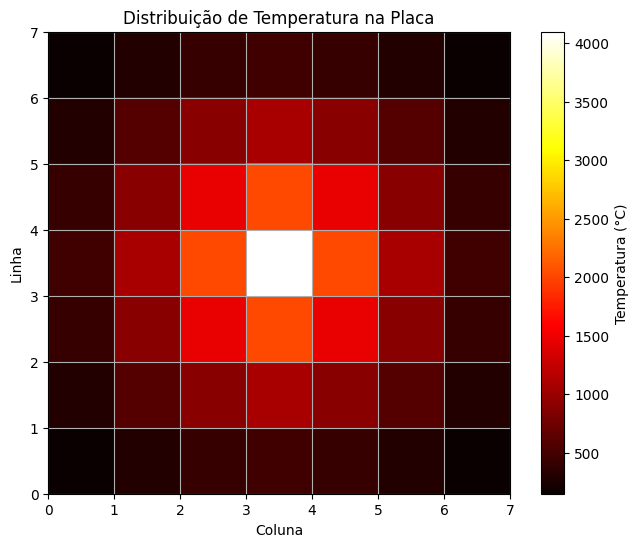

In [31]:
# Plotagem da distribuição de temperatura
plt.figure(figsize=(8, 6))
plt.imshow(np.reshape(resultado, (n, n)), cmap='hot', origin='lower', extent=[0, n, 0, n])
plt.colorbar(label='Temperatura (°C)')
plt.title('Distribuição de Temperatura na Placa')
plt.xlabel('Coluna')
plt.ylabel('Linha')
plt.grid(True)
plt.show()

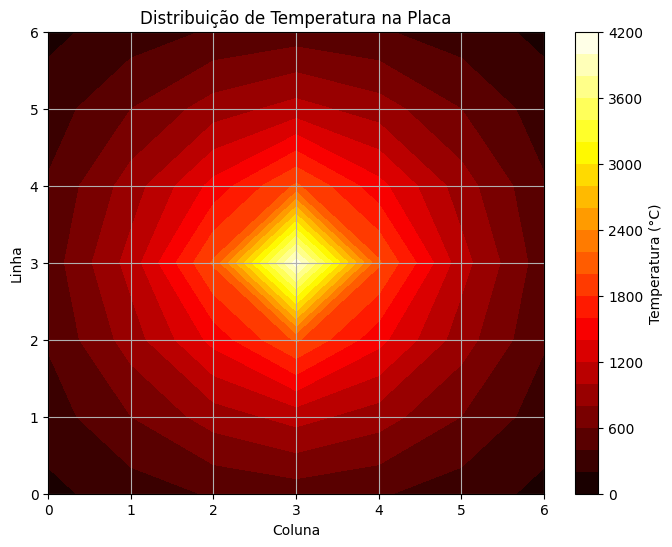

In [32]:
temperatura_placa = np.reshape(resultado, (n, n))
# Cria um gráfico de contorno da distribuição de temperatura na placa
plt.figure(figsize=(8, 6))
contour = plt.contourf(temperatura_placa, cmap='hot', levels=20)
plt.colorbar(contour, label='Temperatura (°C)')
plt.title('Distribuição de Temperatura na Placa')
plt.xlabel('Coluna')
plt.ylabel('Linha')
plt.grid(True)
plt.show()